In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()


GOAL : 
====
predict
* The task is to forecast the total amount of products sold in every shop for the test set.
* The test set. You need to forecast the sales for these shops and products for November 2015.

**Note** 
*  the list of shops and products slightly changes every month

submission :
=====
ID,item_cnt_month
0,0.5
1,0.5
2,0.5
3,0.5

In [2]:
DATA_FOLDER = '../data/'

In [3]:
transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

In [4]:
tests = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

# Data overview

In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [7]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
tests.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [9]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# EDA

In [ ]:
transactions.loc[:,'item_price'].plot('.')

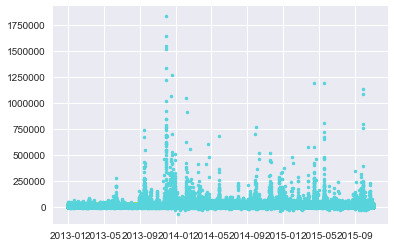

In [120]:
plt.plot(transactions,'.')

In [10]:
trans_date = pd.to_datetime(transactions.date,format='%d.%m.%Y')

In [11]:
# transactions['date'] = transactions.date.map(lambda x:pd.to_datetime(x,format='%d.%m.%Y'))
transactions['date'] = trans_date
transactions.set_index('date',inplace=True)

In [12]:
transactions['amount_price'] = transactions.item_price * transactions.item_cnt_day
revenue_monthly_by_shop = pd.groupby(transactions, by=[transactions.index.year, 
                                                       transactions.index.month, 
                                                       transactions.shop_id])[['amount_price']].sum()

/home/ihong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.groupby() is deprecated and will be removed Please use the Series.groupby() or DataFrame.groupby() methods
  after removing the cwd from sys.path.


In [13]:
revenue_monthly_by_shop.index.rename(['year','month','shop_id'],inplace=True)
revenue_monthly_by_shop.head()

amount_price
year month shop_id              
2013 1     0          2966412.00
           1          1527320.00
           2          1085064.80
           3           560585.01
           4          1433666.00

In [14]:
idx = pd.IndexSlice
monthly_revenue_shop234 = revenue_monthly_by_shop.loc[idx[:,:,range(10,20)],:]
monthly_revenue_shop234.head(10)

amount_price
year month shop_id              
2013 1     10          577494.00
           12          996495.75
           13          225435.00
           14         1264646.00
           15         2024127.00
           16         1999620.50
           18         2742707.00
           19         2118666.55
     2     10          636783.00
           12         1370670.70

In [15]:
monthly_revenue_shop234.reset_index(inplace=True)
monthly_revenue_shop234['date'] = pd.to_datetime(monthly_revenue_shop234.year*10000 + monthly_revenue_shop234.month*100 + 1, format='%Y%m%d')
monthly_revenue_shop234.head()

/home/ihong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,month,shop_id,amount_price,date
0,2013,1,10,577494.00,2013-01-01
1,2013,1,12,996495.75,2013-01-01
2,2013,1,13,225435.00,2013-01-01
3,2013,1,14,1264646.00,2013-01-01
4,2013,1,15,2024127.00,2013-01-01


In [16]:
monthly_revenue_shop234 = monthly_revenue_shop234[['shop_id','amount_price','date']].set_index('date')
monthly_revenue_shop234.head(10)

,shop_id,amount_price
date,,
2013-01-01,10,577494.00
2013-01-01,12,996495.75
2013-01-01,13,225435.00
2013-01-01,14,1264646.00
2013-01-01,15,2024127.00
2013-01-01,16,1999620.50
2013-01-01,18,2742707.00
2013-01-01,19,2118666.55
2013-02-01,10,636783.00


In [17]:
monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price').head()

shop_id,10,11,12,13,14,15,16,17,18,19
date,,,,,,,,,,
2013-01-01,577494.0,NaN,996495.75,225435.0,1264646.0,2024127.0,1999620.5,NaN,2742707.0,2118666.55
2013-02-01,636783.0,NaN,1370670.70,226880.0,1270446.5,2011249.0,1737058.0,NaN,3066448.0,1859942.00
2013-03-01,596111.0,NaN,1893864.10,311521.0,1358005.0,1998164.6,1996357.0,NaN,3304036.7,1937416.00
2013-04-01,368563.0,NaN,1360277.45,240835.0,858036.0,1381703.0,1262198.0,NaN,2247598.0,1430535.00
2013-05-01,353021.0,NaN,1115095.60,225950.0,881561.0,1255709.0,1230459.0,NaN,2443014.0,1206345.00


In [18]:
import matplotlib.dates as mdates
## 

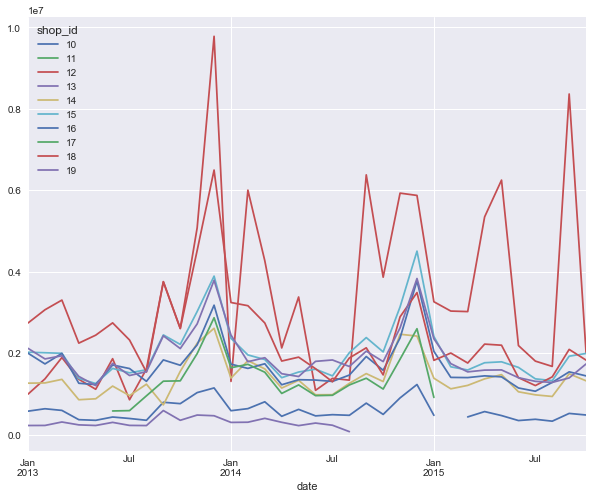

In [19]:
fig,ax = plt.subplots(figsize= (10,8))
## plot each shop monthly reveune
monthly_revenue_plot = monthly_revenue_shop234.pivot(columns='shop_id',values='amount_price')
monthly_revenue_plot.plot(ax=ax,grid=1)

# ax.plot_date(monthly_revenue_plot.axes[0].to_pydatetime(), monthly_revenue_plot, '-')
# ax.xaxis.set_minor_locator(dates.MonthLocator(bymonth=1))
#set ticks every month
#set major ticks format


**FINDING:** 
1. seems there exist peaks periodically at **DEC** and **SEP** , **March**(slightly)
2. some of store would shut down ? (`shop_id=0,1,8`)

___


Q: Hottest items in each shop

In [20]:
## total items
len(items.item_id.unique())

22170

In [21]:
transactions.date_block_num.unique() ## monthly 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [22]:
transactions.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price
date,,,,,,
2013-01-02,0,59,22154,999.00,1.0,999.00
2013-01-03,0,25,2552,899.00,1.0,899.00
2013-01-05,0,25,2552,899.00,-1.0,-899.00
2013-01-06,0,25,2554,1709.05,1.0,1709.05
2013-01-15,0,25,2555,1099.00,1.0,1099.00


In [23]:
item_cnt_monthly_shop = transactions.groupby(['shop_id','date_block_num','item_id',])['item_cnt_day'].sum()

In [24]:
item_cnt_monthly_shop.rename('sold_cnt',inplace=True)
# item_cnt_monthly_shop.reset_index(inplace=True)

shop_id  date_block_num  item_id
0        0               32          6.0
                         33          3.0
                         35          1.0
                         43          1.0
                         51          2.0
                         61          1.0
                         75          1.0
                         88          1.0
                         95          1.0
                         96          1.0
                         98         25.0
                         111         1.0
                         149         3.0
                         151         1.0
                         153         1.0
                         198         1.0
                         210         2.0
                         282         1.0
                         306         1.0
                         351         1.0
                         421         1.0
                         438         1.0
                         482         2.0
                        

In [25]:
# item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num'])['item_id','sold_cnt'].agg({'sold_cnt':min}).reset_index()

In [26]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop.reset_index()
top_sells_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num']).max().reset_index()
# top_sells_monthly_shop_df.head()

In [27]:
item_cnt_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0


In [28]:
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(items,on='item_id')
top_sells_monthly_shop_df = top_sells_monthly_shop_df.merge(item_categories, on ='item_category_id')

In [29]:
top_sells_monthly_shop_df.head()

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,22160,39.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
1,0,1,22160,67.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
2,6,0,22160,45.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
3,6,8,22160,269.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD


In [30]:
top_sells_monthly_shop_df[top_sells_monthly_shop_df.shop_id == 7].sort_values('date_block_num').head()

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
4,7,0,22160,31.0,ЯРМАРКА ТЩЕСЛАВИЯ (Регион),40,Кино - DVD
49,7,1,22151,31.0,ЯВЛЕНИЕ (2012),40,Кино - DVD
290,7,2,22147,75.0,Я-ЛЕГЕНДА WB (регион),40,Кино - DVD
333,7,3,22136,15.0,"Я, АЛЕКС КРОСС (регион)",40,Кино - DVD
249,7,4,22152,50.0,ЯВЛЕНИЕ (2012) (регион),40,Кино - DVD


hottest item_category?

In [31]:
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(items,on='item_id')
item_cnt_monthly_shop_df = item_cnt_monthly_shop_df.merge(item_categories,on='item_category_id')


In [32]:
item_cnt_monthly_shop_df.head(3)

,shop_id,date_block_num,item_id,sold_cnt,item_name,item_category_id,item_category_name
0,0,0,32,6.0,1+1,40,Кино - DVD
1,0,1,32,10.0,1+1,40,Кино - DVD
2,1,0,32,7.0,1+1,40,Кино - DVD


In [33]:
cat_monthly_shop_df = item_cnt_monthly_shop_df.groupby(['shop_id','date_block_num','item_category_name']).agg({'sold_cnt':sum})
cat_monthly_shop_df.head()

sold_cnt
shop_id date_block_num item_category_name             
0       0              Аксессуары - PS3           53.0
                       Аксессуары - PS4           28.0
                       Аксессуары - PSP           16.0
                       Аксессуары - PSVita        28.0
                       Аксессуары - XBOX 360      65.0

In [34]:
g = cat_monthly_shop_df.groupby(level=[0,1],group_keys=None)
# g.apply(lambda x:x.order(ascending=False).head(3))

In [35]:
top_sells_category_monthly_shop = g.apply(lambda x:x.sold_cnt.sort_values(ascending=False).head(5)).reset_index()
top_sells_category_monthly_shop.head(5)

,shop_id,date_block_num,item_category_name,sold_cnt
0,0,0,Кино - DVD,1838.0
1,0,0,Игры PC - Стандартные издания,761.0
2,0,0,Музыка - CD локального производства,426.0
3,0,0,Игры - PS3,345.0
4,0,0,Кино - Blu-Ray,302.0


In [36]:
cond = top_sells_category_monthly_shop.date_block_num== 23
top_sells_category_monthly_shop[(top_sells_category_monthly_shop['shop_id']==6) & cond] 

,shop_id,date_block_num,item_category_name,sold_cnt
810,6,23,Музыка - CD локального производства,508.0
811,6,23,Кино - DVD,383.0
812,6,23,Игры PC - Стандартные издания,291.0
813,6,23,Игры - PS4,255.0
814,6,23,Кино - Blu-Ray,237.0


In [37]:
shopid = 19
mask = (top_sells_category_monthly_shop['shop_id']== shopid)
top3_cat_shop = top_sells_category_monthly_shop[['date_block_num','item_category_name','sold_cnt']][mask]

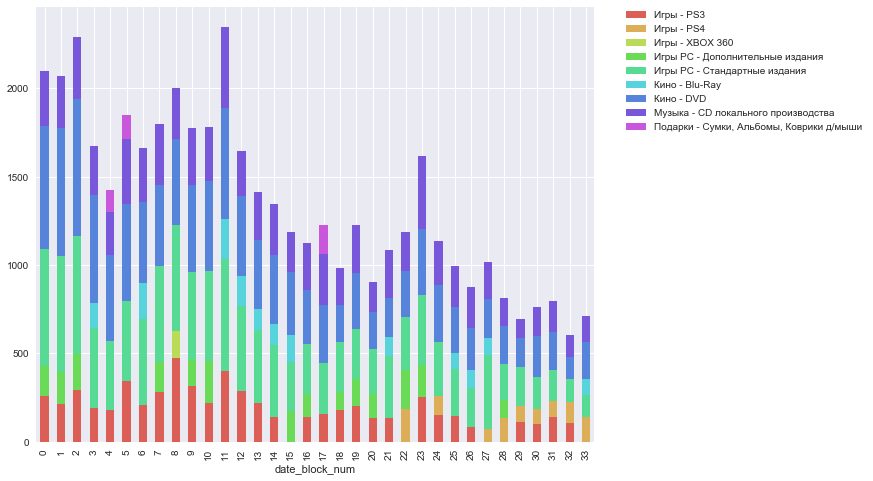

In [38]:
seq_col_brew = sns.color_palette("hls", n_colors=10)

sns.set_palette(seq_col_brew)
top3_cat_shop.pivot(index='date_block_num',columns='item_category_name',values='sold_cnt').plot(figsize= (10,8),kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #outside plot

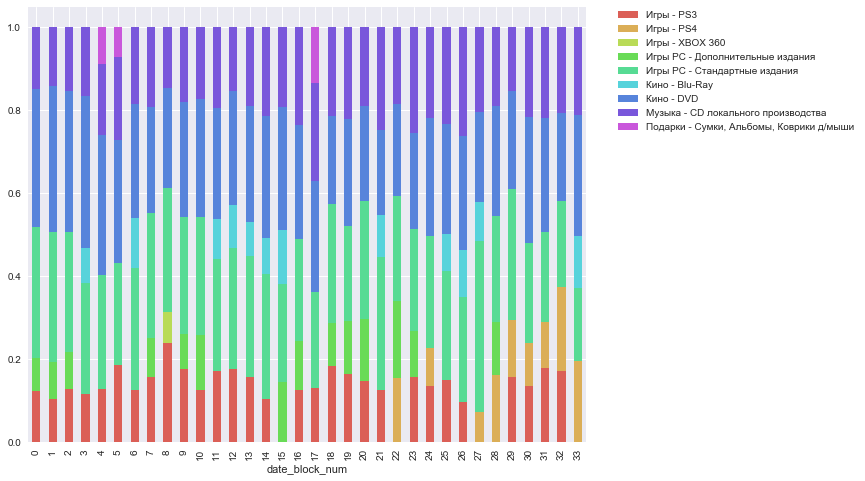

In [39]:
top3_shop_perct = top3_cat_shop.pivot(index='date_block_num',columns='item_category_name',values='sold_cnt')
top3_shop_perct.div(top3_shop_perct.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(10,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #outside plot

**finding**
1. top sell category: 
    - pcgame
    - dvd movie 
    - music
2. DVD (and total) sells amount drop but revenue didn't drop a lot **WHY**
    - guess : some higher price item cover that revenue drop ?? WHAT IS IT??

Q: WHAT **item_category keep growing** to cover the sell amount drop of pcgame, dvd movie...

In [40]:
trans_with_cat = transactions.merge(items,on='item_id')
trans_with_cat = trans_with_cat.merge(item_categories,on='item_category_id')
trans_with_cat.head()
# .groupby(['date_block_num','shop_id',])

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [41]:
monthly_revenue_by_shop_cat = trans_with_cat.groupby(['shop_id','date_block_num','item_category_id','item_category_name'])['amount_price'].sum()

In [42]:
g = monthly_revenue_by_shop_cat.groupby(level=[0,1],group_keys=None)
top3cat_monthly_revenue = g.apply(lambda x:x.sort_values(ascending=False).head(3))


In [43]:
top3cat_monthly_revenue_df = pd.DataFrame(top3cat_monthly_revenue)
shopid = 19
idx = pd.IndexSlice
top3cat_revenue = top3cat_monthly_revenue_df.loc[idx[shopid,:],:]

# [idx[:,:,range(10,20)],:]

In [44]:
# top3cat_revenue.reset_index(inplace=True)

In [45]:
top3cat_revenue.head()

amount_price
shop_id date_block_num item_category_id item_category_name                         
19      0              19               Игры - PS3                        379291.00
                       30               Игры PC - Стандартные издания     320004.00
                       40               Кино - DVD                        193114.00
        1              30               Игры PC - Стандартные издания     350577.77
                       19               Игры - PS3                        314014.50

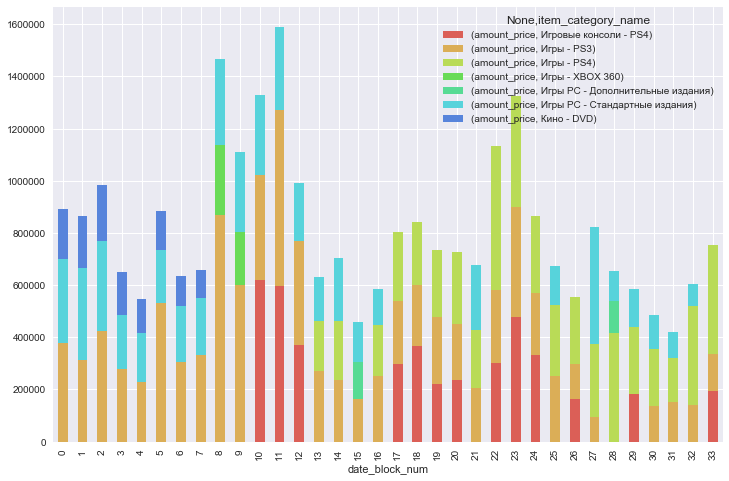

In [46]:
top3cat_revenue.reset_index(level=[0,-2],drop=True).reset_index(level=1).pivot(columns='item_category_name').plot(kind='bar',stacked=True,figsize=(12,8))

**finding:** 
1. seems  ps4,XBOX360 take place of pcgame, DVD revenue

Q: any outlier ?

In [62]:
counts_ = transactions.item_price.value_counts()
counts_.name = 'cnt'
counts_.index.name ='item_price'
item_price_cnt = counts_.reset_index()

In [68]:
item_price_cnt['zone']= pd.qcut(item_price_cnt.item_price,1000)
item_price_cnt.head(10)

,item_price,cnt,zone
0,299.0,291352,"(298.992, 299.372]"
1,399.0,242603,"(398.999, 399.449]"
2,149.0,218432,"(148.97, 149.474]"
3,199.0,184044,"(198.877, 199.321]"
4,349.0,101461,"(348.537, 349.096]"
5,599.0,95673,"(598.987, 599.399]"
6,999.0,82784,"(998.948, 999.208]"
7,799.0,77882,"(798.942, 799.286]"
8,249.0,77685,"(248.494, 249.008]"
9,699.0,76493,"(698.963, 699.291]"


In [71]:
item_price_cnt.groupby('zone')['cnt'].sum()

zone
(-1.001, 3.72]             5929
(3.72, 4.76]                166
(4.76, 4.923]               108
(4.923, 4.961]               66
(4.961, 4.997]               48
(4.997, 19.264]           31192
(19.264, 24.538]            422
(24.538, 26.084]           2101
(26.084, 27.898]            264
(27.898, 33.609]          10186
(33.609, 39.091]            433
(39.091, 44.982]            599
(44.982, 49.045]           4303
(49.045, 51.862]            964
(51.862, 54.906]            102
(54.906, 56.187]            260
(56.187, 57.897]            118
(57.897, 59.563]           8174
(59.563, 62.489]           1063
(62.489, 65.205]           1058
(65.205, 66.963]            214
(66.963, 68.482]            496
(68.482, 69.851]           5540
(69.851, 71.412]           2099
(71.412, 73.692]           1351
(73.692, 75.433]           2939
(75.433, 77.783]           4958
(77.783, 79.347]           5628
(79.347, 82.077]            763
(82.077, 83.544]             86
                          ...  
(15

In [74]:
item_price_cnt.cnt.sum()

2935849

In [76]:
cond = (item_price_cnt.item_price>10) & (item_price_cnt.item_price<100000)
item_price_frac = item_price_cnt[cond]
item_price_frac.cnt.sum()

2899765

In [78]:
print('data keep: {:.2f}%'.format(item_price_frac.cnt.sum()/item_price_cnt.cnt.sum() * 100))

data keep: 98.77%


**choose **

* item_price <= 10, >=100000 -- outlier
* keep 98.77% data

In [79]:
trans_with_cat.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


_____

# FEATURES 

This part most of code stolen from [this blog](http://mlwhiz.com/blog/2017/12/26/How_to_win_a_data_science_competition/)

## Created a dataframe of all Date_block_num, Store and Item combinations:

In [82]:
from itertools import product
# Create "grid" with columns
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = []
for block_num in transactions['date_block_num'].unique():
    cur_shops = transactions.loc[transactions['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = transactions.loc[transactions['date_block_num'] == block_num, 'item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)


In [91]:
grid.shape

(10913850, 3)

## clean up of transaction data
- item_price `<10, >100000`

In [96]:
cond = (trans_with_cat.item_price > 10) & (trans_with_cat.item_price<100000)
trans_with_cat_wo_outlier = trans_with_cat[cond]
trans_with_cat_wo_outlier.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,amount_price,item_name,item_category_id,item_category_name
0,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


## create mean encoding

In [101]:
trans_m = trans_with_cat_wo_outlier.groupby(['date_block_num','shop_id','item_id']).agg(
    {'item_cnt_day': sum,'item_price': np.mean}).reset_index()

In [103]:
trans_m = pd.merge(grid,trans_m,on=['date_block_num','shop_id','item_id'],how='left').fillna(0)

In [105]:
# adding category id 
trans_m = trans_m.merge(items,on='item_id',how='left')

In [118]:
trans_with_cat_wo_outlier.groupby(['shop_id','date_block_num']).agg(np.mean).reset_index()[['item_price','shop_id']]

,item_price,shop_id
0,531.262049,0
1,593.904028,0
2,511.780252,1
3,518.574062,1
4,960.654952,2
5,1062.437181,2
6,949.183882,2
7,1072.295054,2
8,991.558509,2
9,991.224247,2


In [ ]:
for type_id in ['item_id','shop_id','item_category_id']:
    for column_id,aggregator,aggtype in [('item_price',np.mean,'avg'),('item_cnt_day',np.sum,'sum'),('item_cnt_day',np.mean,'avg')]:

        mean_df = trans_with_cat_wo_outlier.groupby([type_id,'date_block_num']).aggregate(aggregator).reset_index()[[column_id,type_id,'date_block_num']]
        mean_df.columns = [type_id+'_'+aggtype+'_'+column_id,type_id,'date_block_num']

        trans_m = pd.merge(trans_m,mean_df,on=['date_block_num',type_id],how='left')